In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('medicine.csv')

In [3]:
df

,Age,Sugar,BP,Medicine
0,5,LOW,NORMAL,A
1,7,NORMAL,NORMAL,A
2,10,NORMAL,LOW,B
3,12,NORMAL,HIGH,B
4,13,HIGH,NORMAL,B
5,18,NORMAL,NORMAL,A
6,22,NORMAL,NORMAL,A
7,24,NORMAL,NORMAL,A
8,27,NORMAL,NORMAL,A
9,34,NORMAL,NORMAL,A


In [4]:
y = df['Medicine']

In [5]:
y

0     A
1     A
2     B
3     B
4     B
5     A
6     A
7     A
8     A
9     A
10    A
11    A
12    B
13    B
14    A
15    B
16    A
Name: Medicine, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
le_BP = LabelEncoder()

In [7]:
le_Sugar = LabelEncoder()

In [8]:
X = pd.DataFrame(columns=['nBP','nSugar','Age'])

In [9]:
X

,nBP,nSugar,Age


In [13]:
X['nBP'] = le_BP.fit_transform(df['BP'])
X['nSugar'] = le_BP.fit_transform(df['Sugar'])
X['Age'] = df['Age']

In [14]:
X

,nBP,nSugar,Age
0,2,1,5
1,2,2,7
2,1,2,10
3,0,2,12
4,2,0,13
5,2,2,18
6,2,2,22
7,2,2,24
8,2,2,27
9,2,2,34


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.4)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
classifier = DecisionTreeClassifier()

In [19]:
classifier.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [20]:
xtrain

,nBP,nSugar,Age
7,2,2,24
2,1,2,10
9,2,2,34
8,2,2,27
12,0,2,40
3,0,2,12
0,2,1,5
14,2,2,59
16,2,2,62
13,2,0,51


In [21]:
ytrain

7     A
2     B
9     A
8     A
12    B
3     B
0     A
14    A
16    A
13    B
Name: Medicine, dtype: object

In [22]:
ytest

10    A
1     A
11    A
15    B
5     A
4     B
6     A
Name: Medicine, dtype: object

In [24]:
classifier.predict(xtest)

array(['A', 'A', 'A', 'B', 'A', 'B', 'A'], dtype=object)

In [25]:
classifier.score(xtest,ytest)

1.0

In [26]:
from sklearn.tree import plot_tree

[Text(156.24, 362.4, 'nBP <= 1.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(78.12, 217.44, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(234.36, 217.44, 'nSugar <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(156.24, 72.47999999999996, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(312.48, 72.47999999999996, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

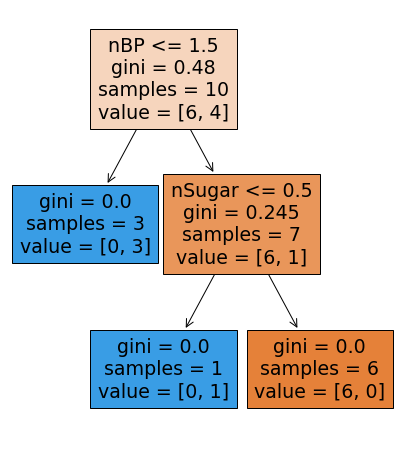

In [28]:
plt.figure(figsize=(7,8))
plot_tree(classifier,filled=True,feature_names=X.columns)

In [29]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm = confusion_matrix(ytest,classifier.predict(xtest))

In [30]:
cm

array([[5, 0],
       [0, 2]], dtype=int64)

C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


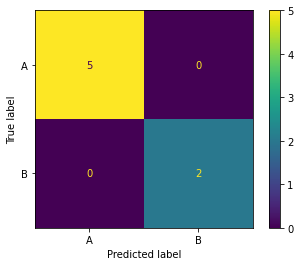

In [31]:
plot_confusion_matrix(classifier,xtest,ytest)

## Random Forrest

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=4)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
RClassifier = RandomForestClassifier()

In [36]:
RClassifier.fit(xtrain,ytrain)

RandomForestClassifier()

In [37]:
xtest

,nBP,nSugar,Age
8,2,2,27
7,2,2,24
3,0,2,12
6,2,2,22


In [38]:
ytest

8    A
7    A
3    B
6    A
Name: Medicine, dtype: object

In [39]:
RClassifier.predict(xtest)

array(['A', 'A', 'B', 'A'], dtype=object)

In [43]:
RClassifier.score(xtest,ytest)

1.0

C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


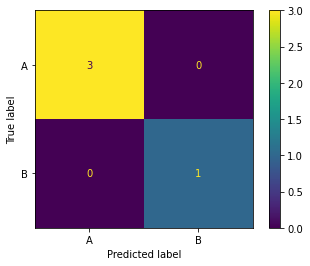

In [44]:
plot_confusion_matrix(RClassifier,xtest,ytest)